In [1]:
import pandas as pd
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython import display as dis
import csv
%matplotlib inline

In [2]:
# Season numbering
reader = csv.reader(open('season_nums.csv', 'rb'))
season_nums = [{r[0] : int(r[1])} for r in reader]   

snums = [pd.DataFrame.from_dict(s, orient='index') for s in season_nums]
snums = pd.concat(snums).reset_index()
snums.columns = ['season', 'season_num']
snums

,season,season_num
0,Palau,10
1,Tocantins,18
2,Borneo,1
3,Africa,3
4,Panama,12
5,Cambodia,31
6,Blood_vs._Water,27
7,Marquesas,4
8,Pearl_Islands,7
9,Vanuatu,9


### Calculate centrality measures

In [3]:
graphs = pickle.load( open("make_graphs.p", "rb" ) )

In [4]:
# Build pandas df of all centrality scores
# Degree, closeness, betweenness, eigenvector, pagerank

# Used for placement order
votes = pickle.load( open("process_votes.p", "rb" ) )

def centrality_scores(season, season_graph):
    deg = nx.degree(season_graph)
    deg = {k: round(v,1) for k,v in deg.iteritems()}

    close = nx.closeness_centrality(season_graph)
    close = {k: round(v,3) for k,v in close.iteritems()}

    btw = nx.betweenness_centrality(season_graph)
    btw = {k: round(v,3) for k,v in btw.iteritems()}

    eig = nx.eigenvector_centrality(season_graph)
    eig = {k: round(v,3) for k,v in eig.iteritems()}
    
    page = nx.pagerank(season_graph)
    page = {k: round(v,3) for k,v in page.iteritems()}

    # Add contestant placement (rank)
    order = list(votes[season].columns)
    place_num = list(range(len(order)))
    place = {order[i]:i+1 for i in place_num}
    
    names = season_graph.nodes()

    # Build a table with centralities 
    table=[[name, deg[name], close[name], btw[name], eig[name], page[name], place[name]] for name in names]

    # Convert table to pandas df
    headers = ['name', 'deg', 'close', 'btw', 'eig', 'page', 'place']
    df = pd.DataFrame(table, columns=headers)
    df = df.sort(['page', 'eig', 'deg'], ascending=[0, 0, 0])
    
    return df

In [5]:
graphs.keys()

[u'Palau',
 u'Tocantins',
 u'Borneo',
 u'Africa',
 u'Panama',
 u'Cambodia',
 u'Blood_vs._Water',
 u'Marquesas',
 u'Pearl_Islands',
 u'Vanuatu',
 u'The_Australian_Outback',
 u'Heroes_vs_Villains',
 u'Guatemala',
 u'China',
 u'Worlds_Apart',
 u'Thailand',
 u'The_Amazon',
 u'Cagayan',
 u'South_Pacific',
 u'One_World',
 u'Philippines',
 u'Caramoan',
 u'Gabon',
 u'Micronesia',
 u'Samoa',
 u'All-Stars',
 u'Nicaragua',
 u'Heroes_vs._Villains',
 u'San_Juan_del_Sur',
 u'Cook_Islands',
 u'Redemption_Island',
 u'Fiji']

In [6]:
# Borneo example
s = graphs.keys()[2]
centrality_scores(s, graphs[s])

,name,deg,close,btw,eig,page,place
14,Rudy,7,0.652,0.045,0.512,0.116,3
4,Susan,7,0.652,0.045,0.500,0.113,4
2,Richard,6,0.600,0.019,0.450,0.093,1
5,Kelly,8,0.652,0.265,0.337,0.091,2
13,Colleen,7,0.625,0.078,0.041,0.086,6
8,Jenna,11,0.789,0.254,0.094,0.085,8
11,Sean,7,0.652,0.045,0.377,0.083,5
0,Gervase,6,0.556,0.010,0.022,0.066,7
12,Gretchen,6,0.556,0.010,0.019,0.054,10
10,Greg,8,0.625,0.182,0.058,0.049,9


### Tabulate values for all seasons

In [7]:
central = {s : centrality_scores(s, graphs[s]) for s in graphs.keys()}

In [8]:
for c in central.keys():
    print c
    dis.display(central[c])

Palau


,name,deg,close,btw,eig,page,place
8,Stephenie,14,0.761,0.426,0.214,0.104,7
15,Jenn,9,0.585,0.051,0.430,0.087,4
1,Ian,8,0.563,0.008,0.425,0.079,3
2,Gregg,9,0.585,0.051,0.369,0.075,6
4,James,7,0.525,0.005,0.073,0.069,12
18,Caryn,8,0.563,0.008,0.360,0.068,5
13,Tom,8,0.563,0.008,0.362,0.065,1
19,Katie,8,0.563,0.008,0.362,0.065,2
17,Angie,7,0.525,0.005,0.069,0.062,13
10,Bobby Jon,7,0.525,0.048,0.060,0.058,10


Tocantins


,name,deg,close,btw,eig,page,place
11,Stephen,10,0.704,0.061,0.393,0.106,2
2,J.T.,11,0.751,0.084,0.368,0.101,1
14,Taj,12,0.805,0.128,0.376,0.099,4
10,Erinn,9,0.663,0.019,0.368,0.095,3
1,Coach,9,0.663,0.019,0.308,0.083,5
8,Debbie,9,0.663,0.019,0.297,0.081,6
7,Sierra,9,0.663,0.019,0.275,0.075,7
12,Tyson,8,0.626,0.010,0.248,0.069,8
3,Brendan,7,0.593,0.004,0.209,0.061,9
6,Joe,6,0.537,0.000,0.158,0.056,10


Borneo


,name,deg,close,btw,eig,page,place
14,Rudy,7,0.652,0.045,0.512,0.116,3
4,Susan,7,0.652,0.045,0.500,0.113,4
2,Richard,6,0.600,0.019,0.450,0.093,1
5,Kelly,8,0.652,0.265,0.337,0.091,2
13,Colleen,7,0.625,0.078,0.041,0.086,6
8,Jenna,11,0.789,0.254,0.094,0.085,8
11,Sean,7,0.652,0.045,0.377,0.083,5
0,Gervase,6,0.556,0.010,0.022,0.066,7
12,Gretchen,6,0.556,0.010,0.019,0.054,10
10,Greg,8,0.625,0.182,0.058,0.049,9


Heroes_vs._Villains


,name,deg,close,btw,eig,page,place
18,Jerri,11,0.661,0.030,0.395,0.080,4
11,Rupert,12,0.691,0.054,0.217,0.078,6
3,Russell,11,0.661,0.030,0.411,0.077,3
15,Candice,14,0.761,0.126,0.214,0.075,8
0,Sandra,11,0.661,0.030,0.382,0.074,1
2,Parvati,9,0.608,0.007,0.403,0.073,2
13,Colby,12,0.691,0.054,0.193,0.070,5
17,Amanda,9,0.608,0.009,0.160,0.067,9
8,Danielle,9,0.608,0.007,0.342,0.064,7
4,J.T.,9,0.608,0.009,0.149,0.064,10


Panama


,name,deg,close,btw,eig,page,place
15,Cirie,10,0.726,0.223,0.438,0.113,4
12,Courtney,9,0.688,0.140,0.407,0.098,6
8,Terry,8,0.653,0.100,0.140,0.098,3
10,Danielle,7,0.594,0.038,0.442,0.095,2
0,Aras,6,0.523,0.009,0.426,0.092,1
3,Austin,7,0.622,0.051,0.106,0.086,9
5,Shane,6,0.523,0.009,0.349,0.075,5
14,Sally,6,0.594,0.139,0.095,0.073,8
9,Nick,5,0.484,0.011,0.056,0.062,10
13,Bruce,5,0.503,0.000,0.297,0.061,7


Cambodia


,name,deg,close,btw,eig,page,place
18,Spencer,17,0.905,0.204,0.405,0.114,6
16,Abi-Maria,16,0.864,0.116,0.385,0.103,1
8,Kelley,13,0.760,0.052,0.346,0.084,4
3,Tasha,12,0.731,0.014,0.350,0.082,7
5,Kimmi,10,0.679,0.002,0.313,0.069,5
1,Jeremy,11,0.704,0.011,0.301,0.068,2
4,Keith,10,0.679,0.002,0.296,0.064,3
10,Kelly,13,0.760,0.090,0.151,0.056,11
15,Stephen,11,0.704,0.011,0.234,0.054,9
6,Andrew,12,0.731,0.014,0.178,0.049,12


Blood_vs._Water


,name,deg,close,btw,eig,page,place
1,Gervase,19,1.000,0.015,0.353,0.078,3
14,Tyson,19,1.000,0.015,0.343,0.078,1
0,Monica,19,1.000,0.015,0.341,0.077,2
9,Hayden,17,0.905,0.001,0.270,0.067,7
12,Tina,19,1.000,0.015,0.277,0.066,4
7,Caleb,17,0.905,0.001,0.266,0.066,9
3,Laura M.,19,1.000,0.015,0.276,0.064,6
10,Ciera,17,0.905,0.001,0.257,0.063,5
4,Aras,19,1.000,0.015,0.256,0.060,11
19,Katie,17,0.905,0.001,0.220,0.056,8


Marquesas


,name,deg,close,btw,eig,page,place
11,Vecepia,10,0.704,0.028,0.421,0.114,1
2,Sean,10,0.704,0.028,0.389,0.107,5
9,Paschal,9,0.663,0.015,0.408,0.098,4
15,Neleh,9,0.663,0.015,0.393,0.093,2
1,Kathy,8,0.626,0.011,0.364,0.083,3
6,Robert,9,0.663,0.006,0.242,0.071,6
12,Tammy,9,0.663,0.006,0.242,0.071,7
14,Rob,10,0.704,0.122,0.136,0.063,10
4,Zoe,9,0.663,0.006,0.213,0.058,8
13,John,8,0.626,0.003,0.168,0.054,9


Pearl_Islands


,name,deg,close,btw,eig,page,place
14,Jon,10,0.726,0.029,0.428,0.107,3
13,Darrah,11,0.769,0.042,0.315,0.098,4
5,Christa,10,0.726,0.029,0.380,0.093,6
10,Sandra,9,0.688,0.021,0.370,0.089,1
6,Lillian,11,0.769,0.042,0.333,0.085,2
11,Burton,9,0.688,0.039,0.321,0.080,5
15,Tijuana,11,0.769,0.042,0.227,0.076,7
12,Rupert,10,0.726,0.029,0.306,0.073,8
9,Ryan O.,10,0.726,0.030,0.159,0.061,9
4,Andrew,6,0.568,0.000,0.110,0.050,10


Vanuatu


,name,deg,close,btw,eig,page,place
6,Eliza,11,0.654,0.054,0.395,0.087,4
9,Chris,11,0.739,0.105,0.276,0.086,1
10,Scout,8,0.586,0.003,0.408,0.085,3
13,Leann,10,0.630,0.011,0.375,0.080,7
14,Twila,9,0.607,0.009,0.384,0.079,2
0,Ami,8,0.586,0.003,0.368,0.076,6
8,Julie,11,0.654,0.110,0.300,0.076,5
3,Chad,9,0.680,0.063,0.151,0.064,8
1,Lea,9,0.680,0.063,0.144,0.062,9
12,Rory,10,0.708,0.119,0.156,0.061,10


The_Australian_Outback


,name,deg,close,btw,eig,page,place
12,Tina,9,0.663,0.027,0.444,0.101,1
14,Keith,10,0.704,0.045,0.425,0.099,3
8,Elisabeth,10,0.704,0.050,0.253,0.096,4
2,Rodger,10,0.704,0.050,0.244,0.094,5
10,Colby,10,0.704,0.059,0.405,0.092,2
0,Amber,8,0.626,0.018,0.351,0.083,6
9,Nick,10,0.704,0.050,0.201,0.082,7
15,Jerri,8,0.626,0.027,0.318,0.076,8
5,Alicia,8,0.626,0.028,0.162,0.072,9
3,Jeff,7,0.593,0.009,0.103,0.052,10


Heroes_vs_Villains


,name,deg,close,btw,eig,page,place
18,Jerri,11,0.661,0.030,0.395,0.080,4
11,Rupert,12,0.691,0.054,0.217,0.078,6
3,Russell,11,0.661,0.030,0.411,0.077,3
15,Candice,14,0.761,0.126,0.214,0.075,8
0,Sandra,11,0.661,0.030,0.382,0.074,1
2,Parvati,9,0.608,0.007,0.403,0.073,2
13,Colby,12,0.691,0.054,0.193,0.070,5
17,Amanda,9,0.608,0.009,0.160,0.067,9
8,Danielle,9,0.608,0.007,0.342,0.064,7
4,J.T.,9,0.608,0.009,0.149,0.064,10


Guatemala


,name,deg,close,btw,eig,page,place
12,Lydia,11,0.697,0.016,0.428,0.100,4
0,Stephenie,10,0.662,0.012,0.415,0.095,2
5,Rafe,10,0.662,0.012,0.415,0.095,3
11,Danni,13,0.779,0.061,0.260,0.083,1
13,Cindy,12,0.735,0.045,0.302,0.082,5
16,Judd,12,0.735,0.045,0.304,0.077,6
14,Gary,12,0.735,0.028,0.235,0.077,7
2,Jamie,10,0.662,0.013,0.316,0.075,8
10,Bobby Jon,12,0.735,0.050,0.140,0.061,9
17,Amy,10,0.662,0.019,0.137,0.047,11


China


,name,deg,close,btw,eig,page,place
4,Todd,9,0.653,0.015,0.430,0.104,1
9,Amanda,9,0.653,0.015,0.430,0.104,3
11,Courtney,10,0.688,0.138,0.359,0.092,2
6,Denise,9,0.653,0.015,0.378,0.091,4
2,Frosti,11,0.769,0.073,0.276,0.091,8
10,Erik,11,0.769,0.073,0.261,0.091,6
0,Peih-Gee,11,0.769,0.073,0.235,0.089,5
3,James,9,0.653,0.015,0.263,0.066,7
8,Jaime,6,0.568,0.008,0.153,0.066,10
15,Jean-Robert,10,0.688,0.039,0.221,0.061,9


Worlds_Apart


,name,deg,close,btw,eig,page,place
3,Carolyn,13,0.773,0.037,0.370,0.093,2
0,Will,13,0.773,0.037,0.363,0.089,3
10,Tyler,13,0.773,0.037,0.348,0.086,7
17,Shirin,12,0.739,0.031,0.275,0.073,8
6,Dan,11,0.680,0.019,0.300,0.072,6
8,Hali,11,0.708,0.229,0.228,0.072,11
15,Rodney,10,0.630,0.069,0.289,0.071,4
14,Sierra,10,0.607,0.054,0.257,0.066,5
12,Joe,11,0.708,0.022,0.247,0.065,10
13,Jenn,10,0.654,0.009,0.241,0.065,9


Thailand


,name,deg,close,btw,eig,page,place
6,Jan,7,0.538,0.046,0.458,0.090,3
7,Brian,6,0.425,0.005,0.465,0.086,1
2,Clay,7,0.538,0.074,0.426,0.081,2
3,Ted,7,0.538,0.046,0.425,0.081,5
1,Jake,7,0.538,0.160,0.095,0.074,6
9,Penny,5,0.475,0.057,0.070,0.074,7
11,Helen,5,0.475,0.013,0.420,0.073,4
14,Stephanie,2,0.133,0.000,0.000,0.073,12
15,Robb,2,0.133,0.000,0.000,0.073,11
0,Ken,4,0.384,0.000,0.056,0.071,8


The_Amazon


,name,deg,close,btw,eig,page,place
4,Rob,9,0.653,0.006,0.430,0.118,3
6,Matthew,11,0.726,0.235,0.379,0.114,2
11,Heidi,11,0.769,0.081,0.374,0.109,5
14,Jenna,9,0.688,0.041,0.371,0.101,1
2,Alex,10,0.688,0.028,0.333,0.094,7
1,Butch,9,0.653,0.006,0.296,0.086,4
13,Deena,10,0.726,0.052,0.290,0.084,8
12,Christy,9,0.688,0.035,0.275,0.078,6
7,Dave,8,0.622,0.003,0.136,0.047,9
9,Roger,6,0.568,0.000,0.118,0.041,10


Cagayan


,name,deg,close,btw,eig,page,place
7,Kass,12,0.773,0.166,0.376,0.104,3
10,Woo,10,0.680,0.224,0.376,0.097,2
16,Spencer,12,0.773,0.110,0.244,0.093,4
9,Tony,8,0.630,0.003,0.400,0.089,1
1,Jefra,10,0.708,0.076,0.379,0.089,7
2,Trish,9,0.680,0.012,0.393,0.087,5
4,Tasha,9,0.680,0.070,0.182,0.073,6
6,LJ,9,0.680,0.012,0.309,0.071,9
3,Jeremiah,10,0.708,0.015,0.197,0.069,8
14,Morgan,10,0.654,0.148,0.130,0.064,10


South_Pacific


,name,deg,close,btw,eig,page,place
8,Cochran,13,0.739,0.041,0.272,0.082,8
7,Brandon,12,0.708,0.035,0.384,0.081,6
1,Coach,9,0.630,0.004,0.406,0.079,2
6,Albert,9,0.630,0.004,0.391,0.078,3
12,Sophie,9,0.630,0.004,0.394,0.077,1
9,Rick,11,0.680,0.019,0.363,0.072,5
11,Dawn,13,0.739,0.041,0.136,0.071,10
17,Whitney,13,0.739,0.041,0.130,0.068,9
3,Edna,10,0.654,0.010,0.333,0.067,7
0,Ozzy,10,0.654,0.013,0.093,0.060,4


One_World


,name,deg,close,btw,eig,page,place
11,Tarzan,13,0.769,0.025,0.321,0.096,6
6,Alicia,12,0.721,0.011,0.368,0.089,5
8,Christina,11,0.678,0.098,0.331,0.085,4
14,Kim,10,0.641,0.001,0.373,0.084,1
17,Sabrina,10,0.641,0.001,0.368,0.084,2
4,Chelsea,10,0.641,0.001,0.354,0.081,3
3,Jay,13,0.769,0.025,0.227,0.074,10
15,Kat,11,0.678,0.004,0.280,0.069,7
13,Troyzan,13,0.769,0.025,0.208,0.069,8
16,Leif,12,0.678,0.017,0.155,0.060,9


Philippines


,name,deg,close,btw,eig,page,place
10,Denise,11,0.678,0.119,0.490,0.140,1
7,Malcolm,12,0.721,0.130,0.452,0.127,4
9,Michael,8,0.576,0.006,0.377,0.084,3
12,Lisa,6,0.501,0.002,0.352,0.081,2
14,Jonathan,10,0.641,0.110,0.228,0.081,7
13,Abi-Maria,9,0.607,0.008,0.265,0.077,5
17,Carter,9,0.607,0.014,0.241,0.075,6
5,Jeff,8,0.576,0.011,0.192,0.065,10
0,Pete,8,0.576,0.006,0.157,0.057,8
2,Artis,8,0.576,0.006,0.148,0.054,9


Caramoan


,name,deg,close,btw,eig,page,place
7,Sherri,13,0.760,0.063,0.318,0.081,3
16,Dawn,10,0.679,0.002,0.400,0.079,2
6,Brenda,13,0.760,0.097,0.350,0.078,6
13,Erik,13,0.760,0.097,0.324,0.075,5
18,Cochran,10,0.679,0.010,0.373,0.074,1
11,Eddie,16,0.864,0.145,0.181,0.070,4
15,Andrea,11,0.704,0.003,0.329,0.069,7
5,Phillip,12,0.731,0.012,0.315,0.065,10
2,Michael,14,0.792,0.080,0.142,0.063,11
19,Reynold,13,0.760,0.090,0.146,0.059,8


Gabon


,name,deg,close,btw,eig,page,place
8,Matty,11,0.717,0.040,0.459,0.112,4
10,Crystal,10,0.684,0.029,0.453,0.105,6
1,Ken,12,0.753,0.055,0.432,0.103,5
3,Susie,11,0.684,0.039,0.364,0.086,2
9,Sugar,11,0.717,0.062,0.346,0.086,3
15,Bob,10,0.655,0.022,0.155,0.065,1
12,Randy,11,0.684,0.046,0.154,0.062,8
0,Corinne,9,0.627,0.015,0.089,0.054,7
4,Ace,10,0.684,0.054,0.144,0.049,12
16,G.C.,8,0.602,0.014,0.169,0.047,14


Micronesia


,name,deg,close,btw,eig,page,place
13,Cirie,14,0.741,0.044,0.458,0.112,3
17,Amanda,13,0.711,0.028,0.435,0.097,2
12,Erik,12,0.711,0.053,0.336,0.087,5
0,Ozzy,13,0.711,0.028,0.372,0.084,9
3,Natalie,13,0.741,0.088,0.240,0.075,4
4,Parvati,12,0.682,0.026,0.311,0.069,1
10,Alexis,13,0.711,0.105,0.197,0.063,6
7,James,11,0.656,0.013,0.235,0.054,7
1,Ami,11,0.632,0.019,0.199,0.047,11
8,Eliza,11,0.656,0.020,0.148,0.043,10


Samoa


,name,deg,close,btw,eig,page,place
9,Jaison,15,0.826,0.088,0.419,0.102,5
12,Mick,15,0.826,0.238,0.415,0.102,3
5,Russell H.,14,0.792,0.060,0.433,0.100,2
2,Natalie,14,0.792,0.060,0.418,0.096,1
7,Brett,12,0.731,0.015,0.280,0.079,4
0,Monica,12,0.731,0.015,0.230,0.070,7
11,Dave,12,0.731,0.015,0.188,0.061,8
17,Laura,12,0.731,0.015,0.147,0.052,10
6,Shambo,12,0.731,0.109,0.165,0.049,6
16,John,12,0.731,0.015,0.144,0.049,9


All-Stars


,name,deg,close,btw,eig,page,place
13,Jenna L.,10,0.641,0.074,0.418,0.104,3
1,Amber,9,0.576,0.036,0.430,0.102,1
14,Shii Ann,11,0.678,0.073,0.267,0.099,6
6,Rupert,9,0.576,0.037,0.389,0.095,4
4,Rob M.,7,0.524,0.012,0.414,0.092,2
10,Tom,8,0.549,0.021,0.367,0.087,5
11,Lex,8,0.576,0.039,0.127,0.067,9
16,Jerri,8,0.549,0.037,0.110,0.063,10
5,Alicia,8,0.549,0.021,0.247,0.062,7
0,Kathy,8,0.576,0.020,0.121,0.060,8


Fiji


,name,deg,close,btw,eig,page,place
2,Yau-Man,14,0.781,0.068,0.366,0.102,4
8,Mookie,13,0.735,0.045,0.314,0.091,8
14,Dreamz,10,0.595,0.007,0.342,0.081,3
0,Earl,10,0.625,0.027,0.297,0.075,1
11,Stacy,11,0.625,0.010,0.316,0.074,6
3,Alex,10,0.595,0.007,0.311,0.074,7
9,Boo,11,0.625,0.010,0.289,0.068,5
18,Rocky,13,0.735,0.045,0.231,0.065,12
1,Michelle,12,0.694,0.037,0.209,0.064,10
5,Edgardo,9,0.568,0.001,0.265,0.063,9


Africa


,name,deg,close,btw,eig,page,place
6,Kim J.,10,0.750,0.023,0.424,0.105,2
10,Ethan,10,0.750,0.023,0.424,0.105,1
13,Lex,10,0.750,0.023,0.413,0.103,3
12,Tom,11,0.789,0.179,0.359,0.099,4
15,Kim P.,10,0.750,0.076,0.261,0.091,6
3,Frank,11,0.789,0.111,0.257,0.083,7
5,Teresa,10,0.750,0.090,0.256,0.083,5
8,Kelly,10,0.750,0.023,0.262,0.069,9
7,Brandon,9,0.714,0.059,0.195,0.069,8
1,Clarence,7,0.577,0.006,0.146,0.041,10


San_Juan_del_Sur


,name,deg,close,btw,eig,page,place
10,Baylor,13,0.793,0.066,0.406,0.103,5
12,Jaclyn,13,0.793,0.135,0.384,0.102,2
17,Alec,13,0.793,0.066,0.330,0.097,7
11,Missy,10,0.684,0.051,0.361,0.087,3
15,Keith,10,0.684,0.010,0.329,0.082,4
9,Wes,9,0.655,0.013,0.255,0.076,9
1,Natalie,9,0.655,0.034,0.292,0.073,1
16,Jon,8,0.627,0.002,0.301,0.067,6
7,Josh,9,0.655,0.013,0.181,0.054,11
2,Jeremy,11,0.717,0.065,0.138,0.045,10


Cook_Islands


,name,deg,close,btw,eig,page,place
7,Adam,13,0.741,0.043,0.343,0.089,5
2,Parvati,13,0.741,0.043,0.332,0.088,6
15,Jonathan,13,0.741,0.121,0.345,0.083,7
9,Sundra,11,0.656,0.047,0.338,0.078,4
0,Ozzy,10,0.632,0.064,0.309,0.075,2
1,Becky,9,0.609,0.032,0.314,0.072,3
11,Yul,9,0.609,0.032,0.314,0.072,1
10,Candice,11,0.682,0.021,0.302,0.067,8
14,Jenny,9,0.632,0.007,0.223,0.064,10
18,Nate,10,0.656,0.123,0.197,0.063,9


Redemption_Island


,name,deg,close,btw,eig,page,place
1,Mike,9,0.680,0.018,0.117,0.084,6
14,Ashley,10,0.708,0.037,0.425,0.076,4
5,Grant,11,0.739,0.067,0.375,0.075,8
0,Steve,9,0.680,0.018,0.096,0.073,10
10,Matthew,15,0.895,0.351,0.102,0.072,7
7,Rob,7,0.607,0.018,0.407,0.071,1
17,Julie,9,0.680,0.018,0.093,0.070,11
11,Ralph,9,0.680,0.050,0.073,0.069,9
2,Natalie,5,0.500,0.000,0.418,0.068,3
6,Phillip,6,0.586,0.006,0.405,0.068,2


Nicaragua


,name,deg,close,btw,eig,page,place
15,Holly,16,0.853,0.055,0.381,0.095,4
8,Dan,16,0.853,0.055,0.342,0.088,5
19,Chase,12,0.711,0.006,0.354,0.076,2
17,Sash,12,0.711,0.006,0.329,0.073,3
16,NaOnka,12,0.711,0.006,0.306,0.068,9
14,Jane,17,0.898,0.073,0.239,0.065,6
1,Marty,16,0.853,0.057,0.207,0.063,11
7,Benry,12,0.711,0.006,0.283,0.062,7
2,Fabio,13,0.741,0.068,0.259,0.061,1
3,Kelly S.,12,0.711,0.006,0.238,0.055,8


### Winner table

In [9]:
# Test structure
borneo = central['Borneo']
borneo[borneo['place']==1]

,name,deg,close,btw,eig,page,place
2,Richard,6,0.6,0.019,0.45,0.093,1


In [10]:
# Create winners dataframe
winner_list = [central[i][central[i]['place']==1] for i in central.keys()]
winners = pd.concat(winner_list).reset_index(drop=True)

# Add season and season_num; Drop place (all 1)
winners['season'] = central.keys()
winners = winners.merge(snums)
winners.drop('place', 1, inplace=True)
winners = winners.sort(['season_num'])
winners

,name,deg,close,btw,eig,page,season,season_num
2,Richard,6,0.600,0.019,0.450,0.093,Borneo,1
10,Tina,9,0.663,0.027,0.444,0.101,The_Australian_Outback,2
26,Ethan,10,0.750,0.023,0.424,0.105,Africa,3
7,Vecepia,10,0.704,0.028,0.421,0.114,Marquesas,4
14,Brian,6,0.425,0.005,0.465,0.086,Thailand,5
15,Jenna,9,0.688,0.041,0.371,0.101,The_Amazon,6
8,Sandra,9,0.688,0.021,0.370,0.089,Pearl_Islands,7
24,Amber,9,0.576,0.036,0.430,0.102,All-Stars,8
9,Chris,11,0.739,0.105,0.276,0.086,Vanuatu,9
0,Tom,8,0.563,0.008,0.362,0.065,Palau,10


array([<matplotlib.axes.AxesSubplot object at 0x1083a6dd0>,
       <matplotlib.axes.AxesSubplot object at 0x1086b7390>], dtype=object)

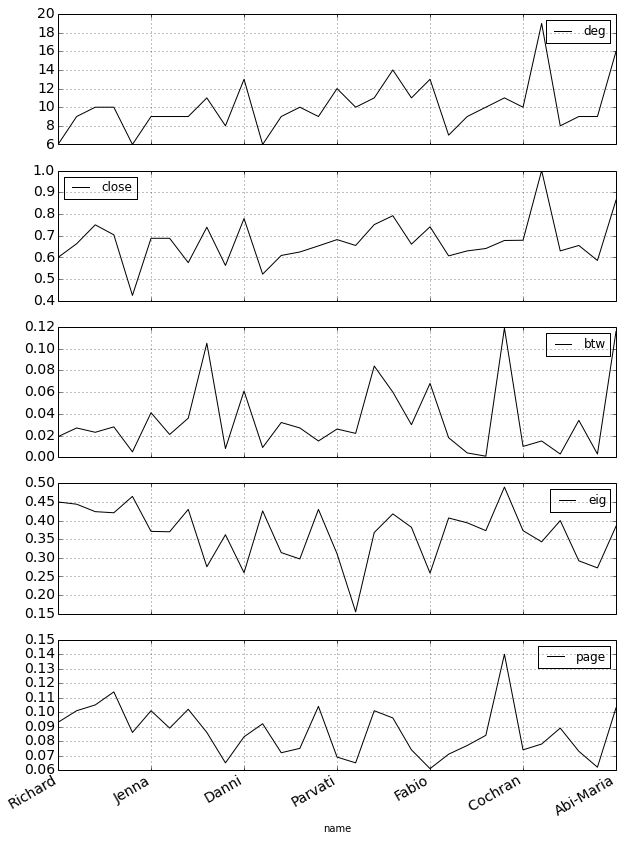

In [11]:
winners.plot(x="name", 
             y=['deg', 'close', 'btw', 'eig', 'page'], 
             subplots=True,
             figsize=(10,15),
             fontsize=14)

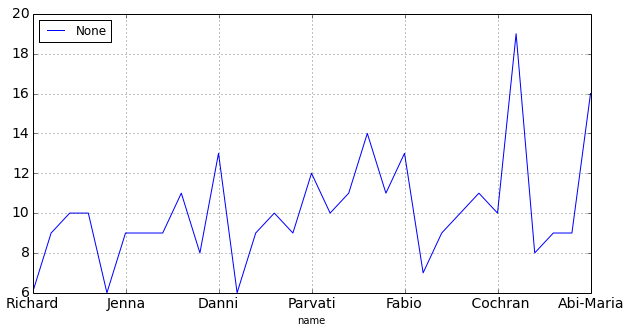

In [12]:
winners.plot(x="name", y='deg', figsize=(10,5), fontsize=14)

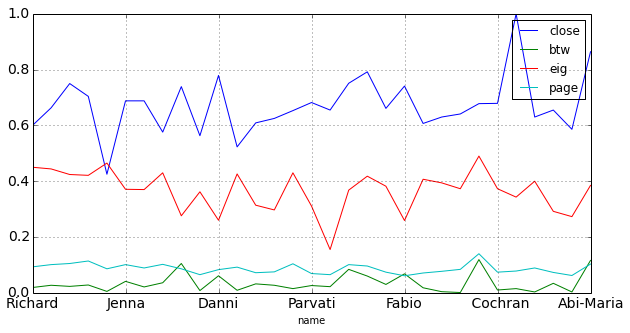

In [13]:
winners.plot(x="name", y=['close', 'btw', 'eig', 'page'],
            figsize=(10,5), fontsize=14)

### Network distance

In [14]:
def distance_scores(season, graph):
    
    # Take largest connected component
    g = graph if nx.is_connected(graph) else max(nx.connected_component_subgraphs(graph), key=len)
    
    # Ratio of largest connected component subgraph
    conn = len(max(nx.connected_component_subgraphs(g), key=len)) / float(nx.number_of_nodes(graph))
    conn = np.round(conn, 3)
    
    # Radius, diameter
    rad = nx.radius(g)
    diam = nx.diameter(g)
    
    # Average eccentricity
    ecc = np.mean(nx.eccentricity(g).values())
    ecc = np.round(ecc, 3)
    
    # Put it all into a dataframe
    df = pd.DataFrame([[season,conn,rad,diam,ecc]], columns=['season', 'conn', 'rad', 'diam', 'ecc'])
    
    return df

In [15]:
d = [distance_scores(s, graphs[s]) for s in graphs.keys()]

In [16]:
distance = pd.concat(d)
distance = distance.merge(snums)
distance = distance.sort(['season_num'])
distance

,season,conn,rad,diam,ecc,season_num
2,Borneo,1.000,2,4,2.938,1
10,The_Australian_Outback,0.875,2,3,2.286,2
3,Africa,1.000,2,3,2.438,3
7,Marquesas,0.875,2,2,2.000,4
14,Thailand,0.750,2,3,2.500,5
15,The_Amazon,0.938,2,4,2.933,6
8,Pearl_Islands,0.938,2,3,2.200,7
24,All-Stars,0.833,2,4,2.867,8
9,Vanuatu,1.000,2,4,3.056,9
0,Palau,0.900,2,4,3.111,10


array([<matplotlib.axes.AxesSubplot object at 0x10b64ce50>,
       <matplotlib.axes.AxesSubplot object at 0x10c6ee910>], dtype=object)

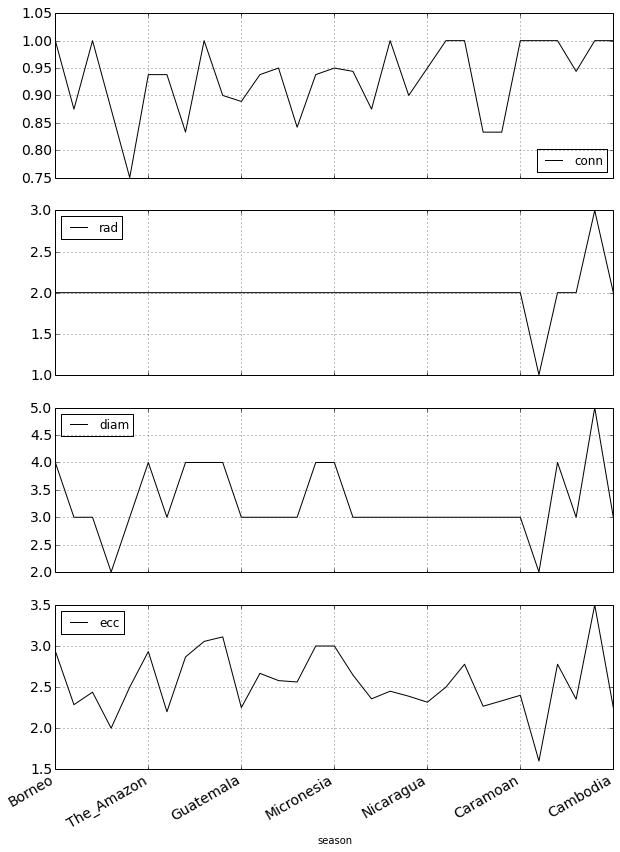

In [17]:
distance.plot(x="season", 
             y=['conn', 'rad', 'diam', 'ecc'], 
             subplots=True,
             figsize=(10,15),
             fontsize=14)

### Eyeballing the tables and graphs...
* No real changes in distance (presumably too small a network?)
* Slight upwards trend in winner degrees and closeness (more alliance shifting and/or game rules that mixes players more?)
* Slight downwards trend in eigenvalue and pagerank (winner less dominant?)
* Should do centrality averages for each season